In [16]:
# %%capture
# !pip install -U pandasql
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import altair as alt
from scipy import stats
# from pandasql import sqldf

In [13]:
table

,Unnamed: 0,Date,Ammonia,PM10,PM25,Wind_speed,Temperature,Rainfall,Quadrante
0,0,2014-01-01T00:00:00Z,0.0,6.0,7.0,0.443554,-0.334965,0.0,2
1,1,2014-01-02T00:00:00Z,0.0,6.0,5.0,0.355915,-0.486111,7.8,2
2,2,2014-01-03T00:00:00Z,0.0,11.0,4.0,0.207631,2.220588,0.0,2
3,3,2014-01-04T00:00:00Z,0.0,6.0,7.0,1.024926,2.137063,35.8,2
4,4,2014-01-05T00:00:00Z,0.0,3.0,8.0,0.666721,2.416084,25.0,2
...,...,...,...,...,...,...,...,...,...
2523,2523,2020-12-27T00:00:00Z,0.0,4.0,5.0,0.314898,-3.706944,0.0,1
2524,2524,2020-12-28T00:00:00Z,0.0,2.0,5.0,0.345959,-3.006250,27.6,2
2525,2525,2020-12-29T00:00:00Z,0.0,2.0,0.0,1.031443,-0.051389,2.2,2
2526,2526,2020-12-30T00:00:00Z,0.0,0.0,0.0,0.029681,-0.549306,0.0,3


In [41]:
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)


In [34]:
table = pd.read_csv('/Users/davidguzman/Downloads/Quadranti.csv')
table.head()
features = ["Date","PM10","PM25","Ammonia","Wind_speed","Quadrante","Temperature","Rainfall"]
Moggio = table.loc[:,features]
Moggio.rename(columns = {'Quadrante':'Quadrant'}, inplace = True)
Moggio = Moggio.dropna(how="any")

In [43]:
table = pd.read_csv('/Users/davidguzman/Downloads/QuadrantiCremona2.csv')
table.head()
features = ["Date","PM10","PM25","Ammonia","Wind_speed","Quadrante","Temperature","Rainfall"]
Cremona = table.loc[:,features]
Cremona.rename(columns = {'Quadrante':'Quadrant'}, inplace = True)
Cremona = Cremona.dropna(how="any")

In [45]:
table = pd.read_csv('/Users/davidguzman/Downloads/QuadrantiSchivenoglia2.csv')
table.head()
features = ["Date","PM10","PM25","Ammonia","Wind_speed","Quadrante","Temperature","Rainfall"]
Schivenoglia = table.loc[:,features]
Schivenoglia.rename(columns = {'Quadrante':'Quadrant'}, inplace = True)
Schivenoglia = Schivenoglia.dropna(how="any")

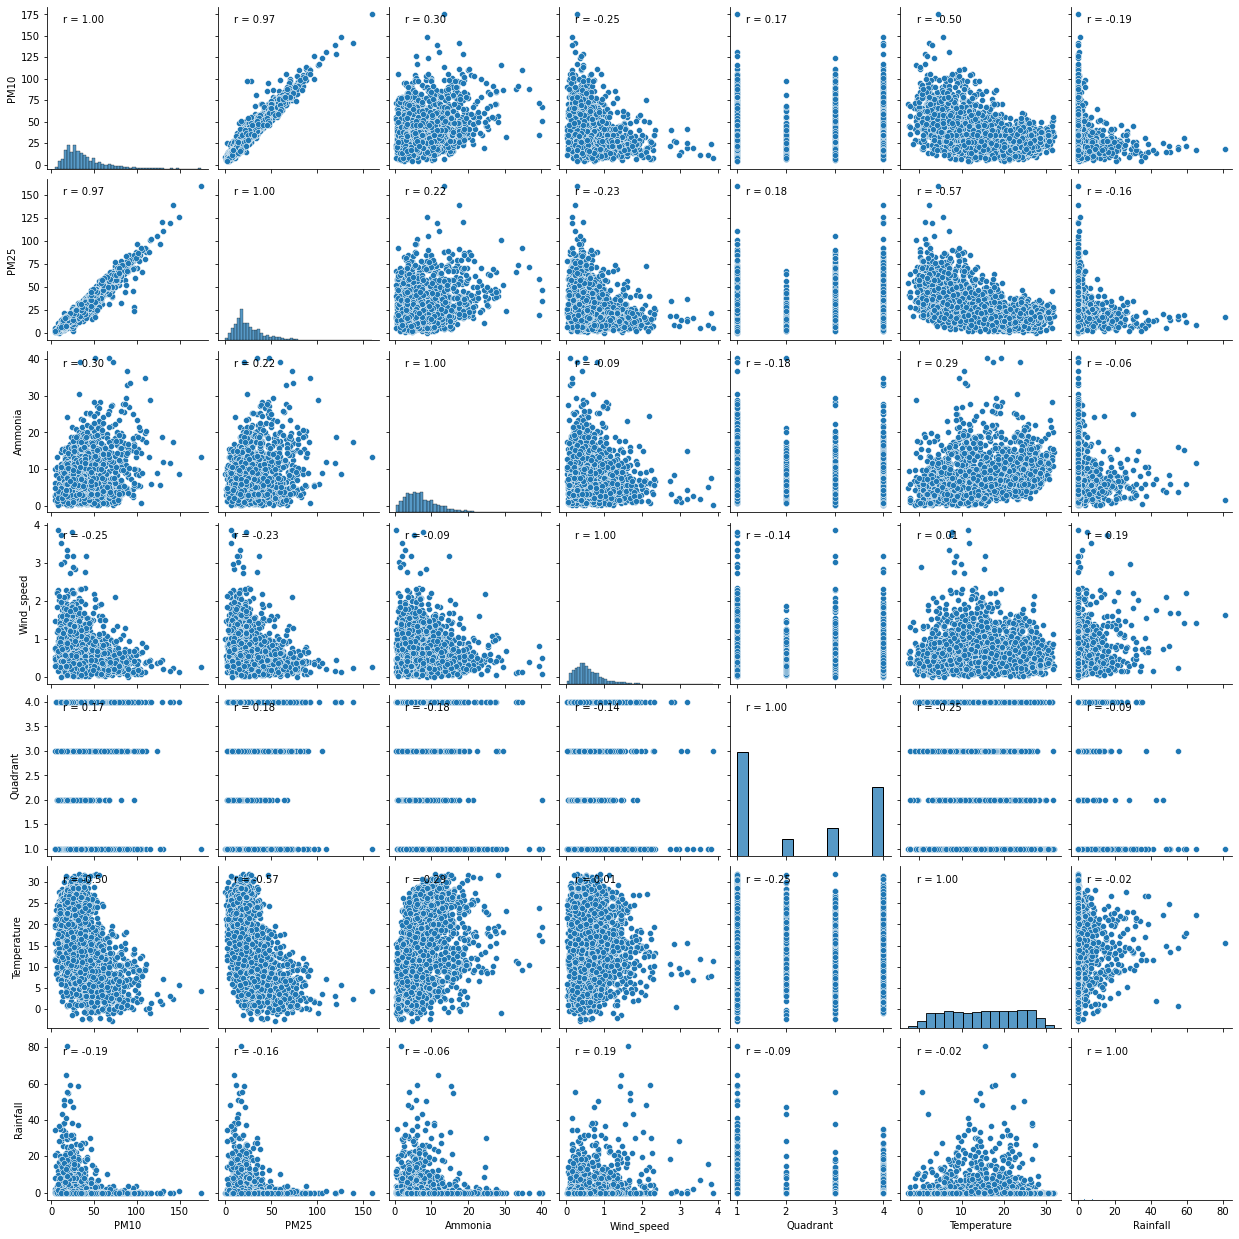

In [44]:
g = sns.pairplot(Cremona)
g.map(corrfunc)

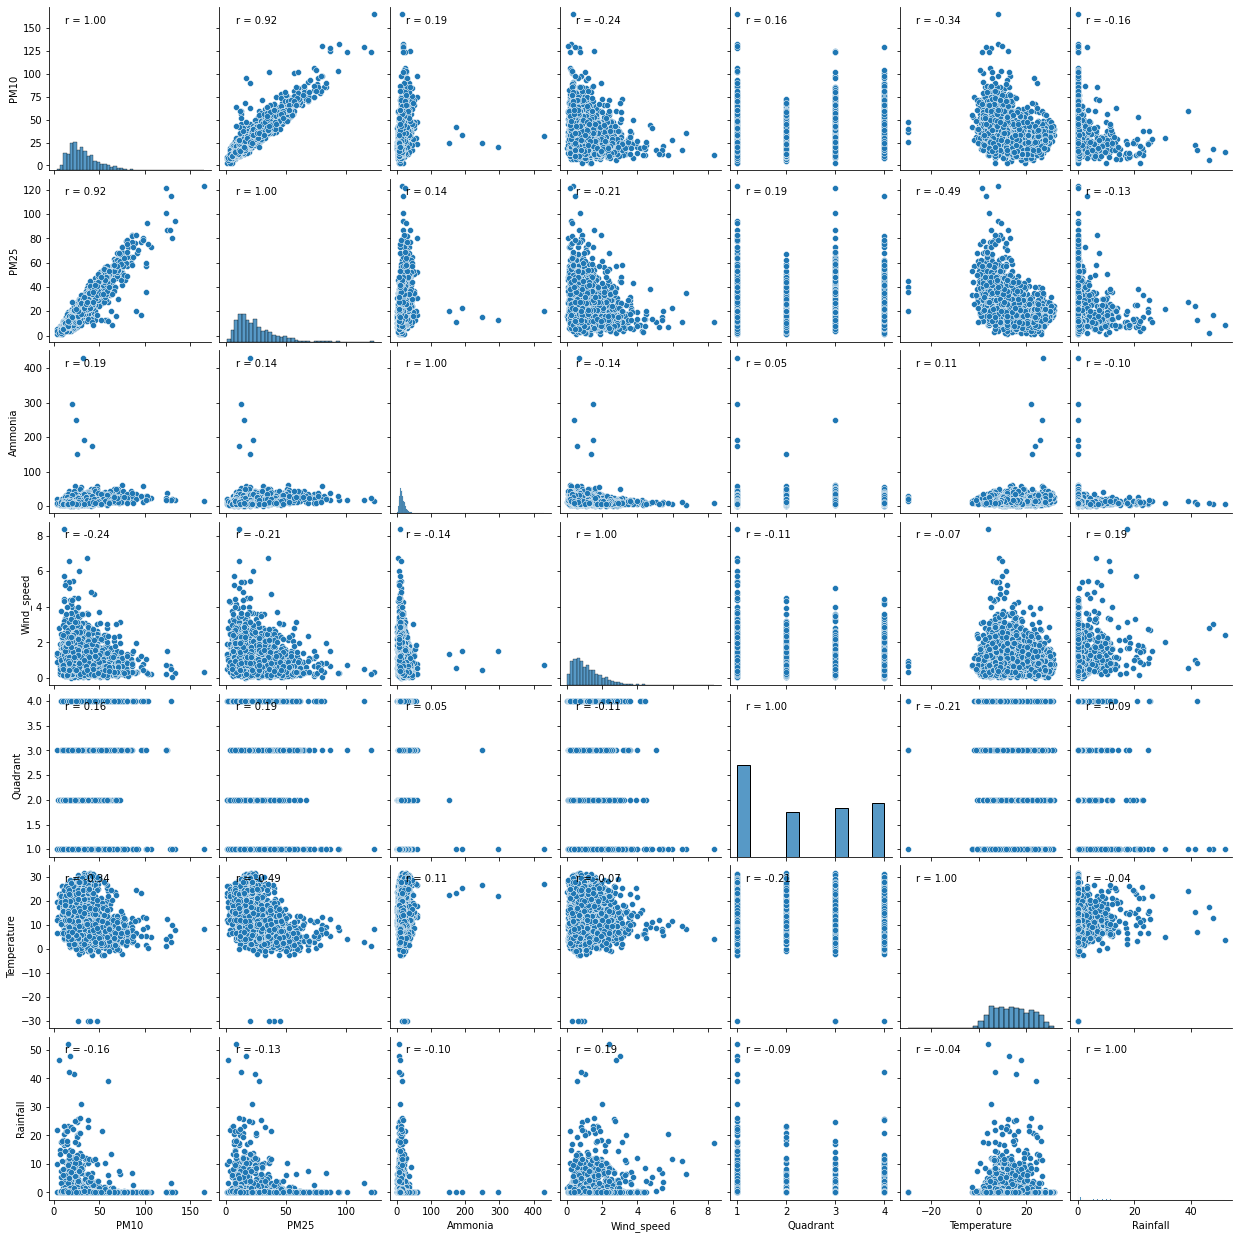

In [46]:
g = sns.pairplot(Schivenoglia)
g.map(corrfunc)

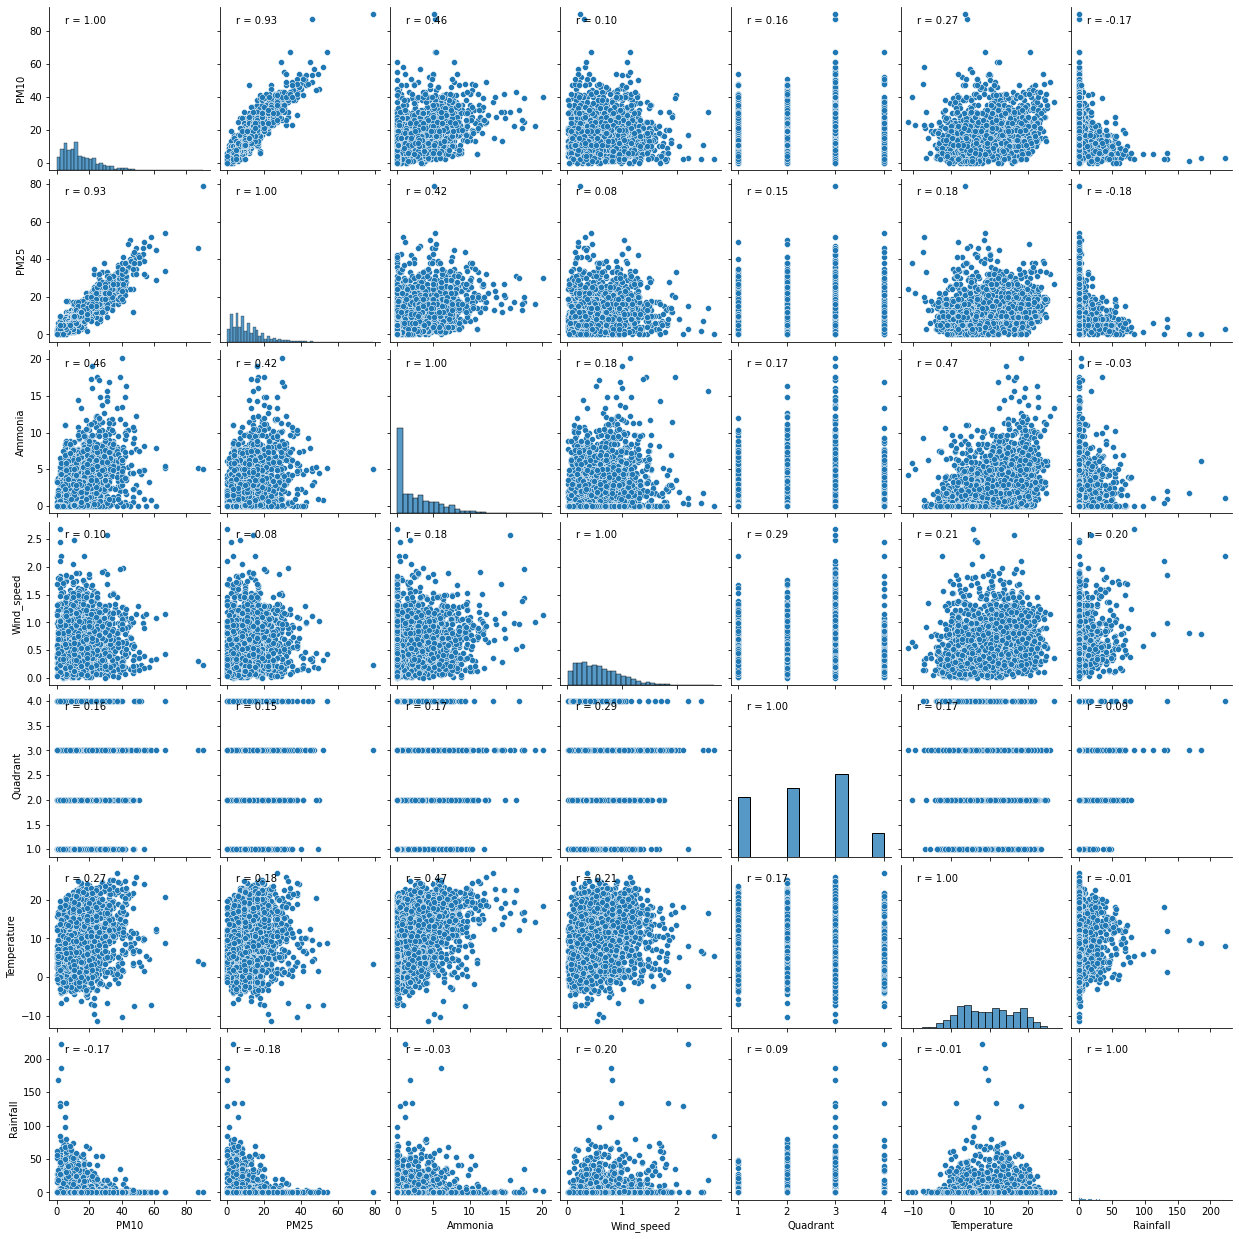

In [42]:
g = sns.pairplot(Moggio)
g.map(corrfunc)

/Users/davidguzman/miniforge3/envs/NNenv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


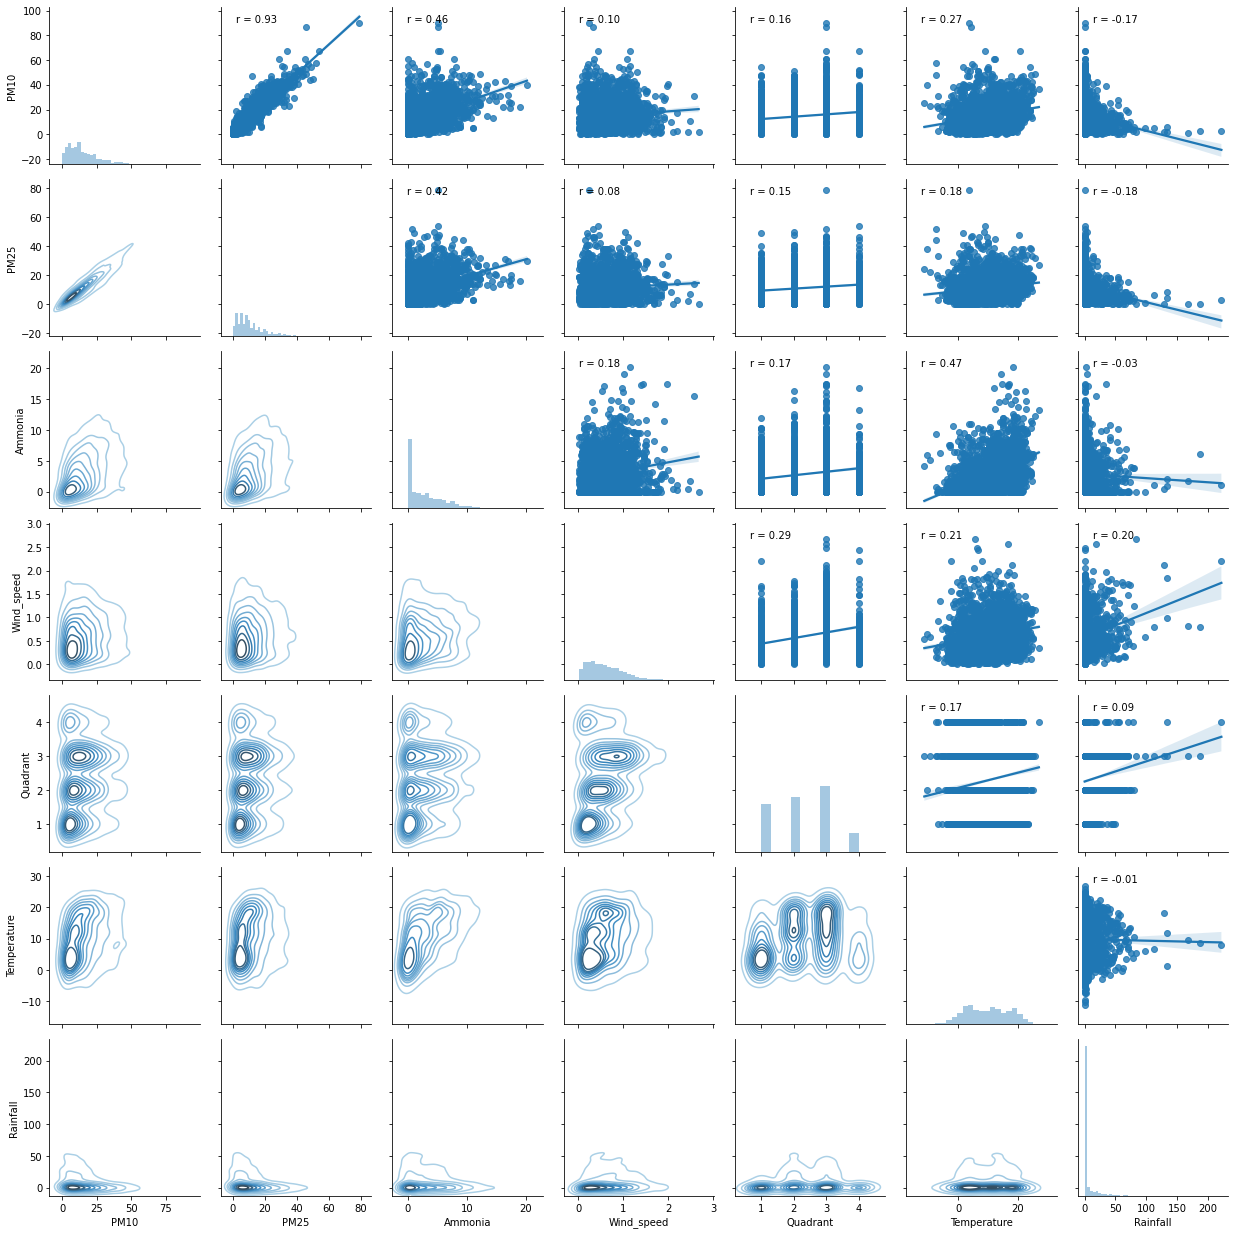

In [40]:

g = sns.PairGrid(Moggio, palette=["red"])
g.map_upper(sns.regplot, scatter = True)
g.map_diag(sns.distplot, kde=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(corrfunc)

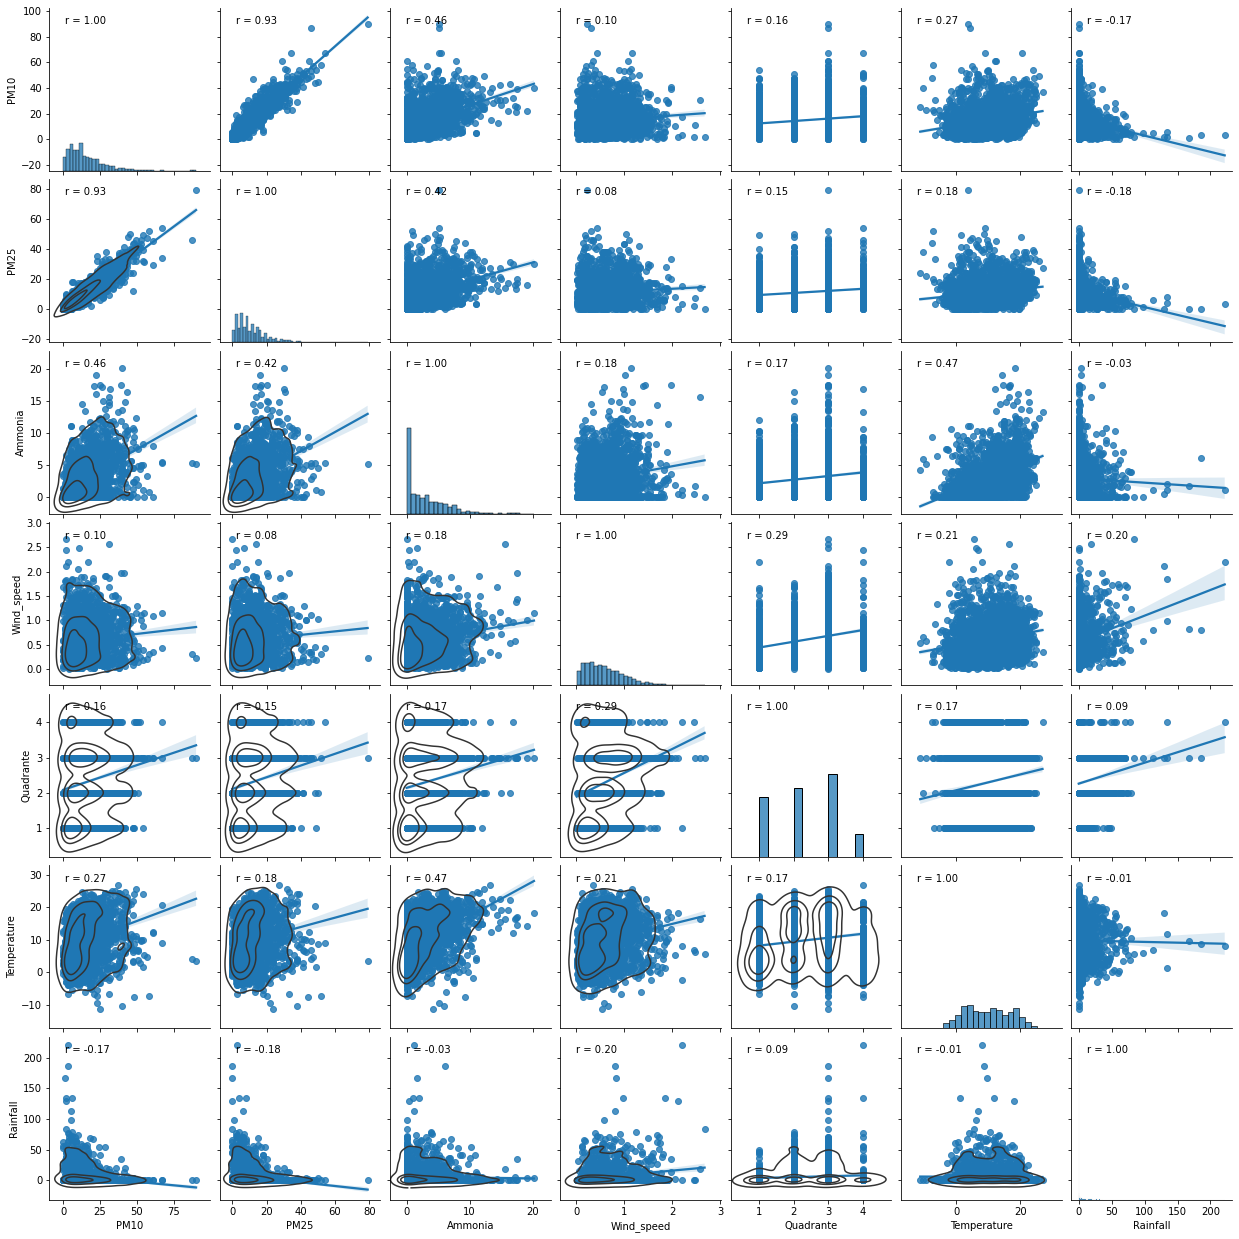

In [33]:
g = sns.pairplot(Moggio, kind="reg")
g.map(corrfunc)
g.map_lower(sns.kdeplot, levels=4, color=".2")